In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
sns.set()
titanic = pd.read_csv('titanic_train.csv')

In [81]:
any(titanic)<0  ##the Fastest way

False

In [82]:
cat_null

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [83]:
titanic.drop(cat_null,axis=1,inplace=True)

###  Filter columns that contains negative values

In [68]:
s = titanic.min(axis=0)
list(s[s < 0].keys())

[]

In [69]:
data = titanic.select_dtypes(['object'])
data.head(2)

""
0
1


### Heat map correlation

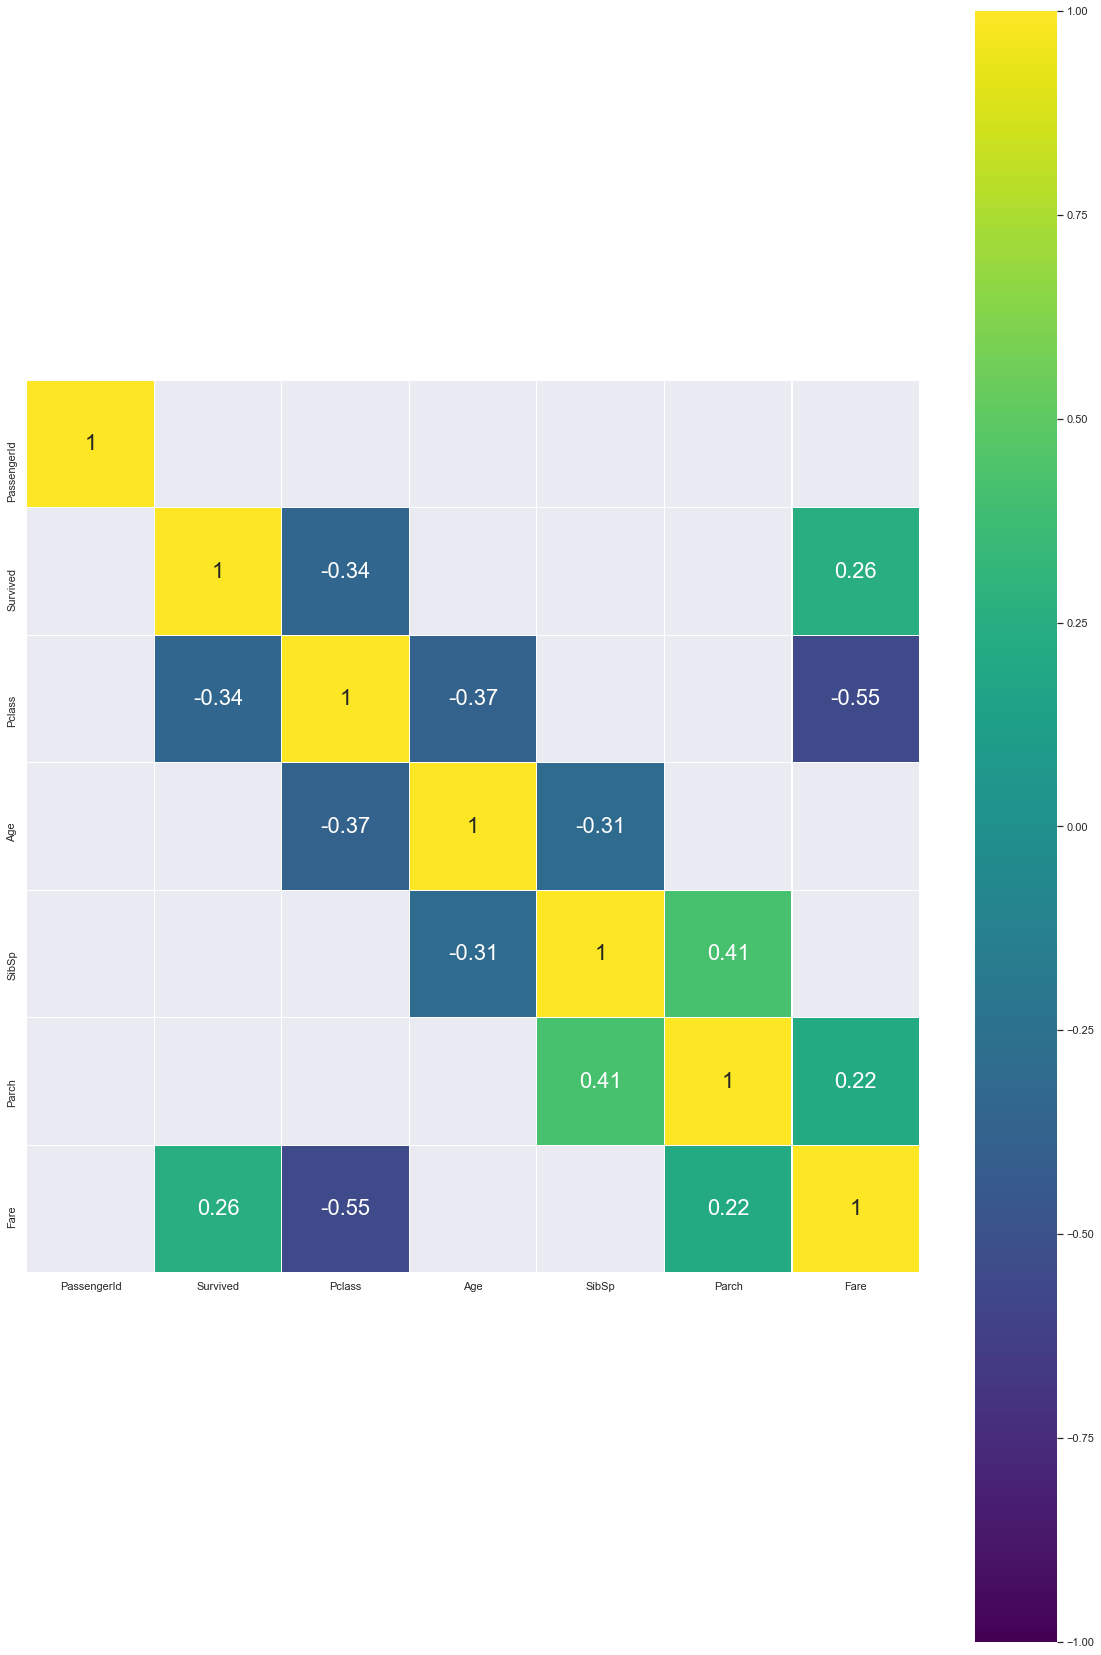

In [84]:
#corr = df.drop('gender', axis=1).corr() # We already examined SalePrice correlations
corr=titanic.corr()
plt.figure(figsize=(20,30))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 22}, square=True);

In [50]:
# impute missing  onehot , outlier , imbalance

In [4]:
null_columns=titanic.columns[titanic.isnull().any()]

In [5]:
df2=titanic[null_columns]

In [ ]:
df = df.dropna(axis=0, subset=['Charge_Per_Line'])

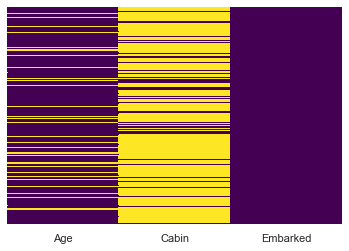

In [6]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# If the missing value isn’t identified as NaN , then we have to first convert or replace such non NaN entry with a NaN.
df[‘column_name’].replace(0, np.nan, inplace= True)  #### 

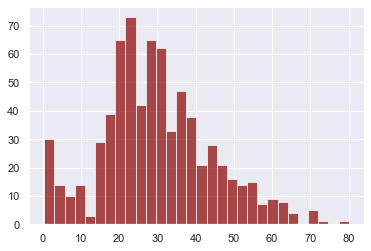

In [7]:
titanic['Age'].hist(bins=30, color='darkred', alpha=0.7)

In [20]:
cat_null=data.select_dtypes(['object']).columns.tolist()
cat_null

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [67]:
num_null=titanic.columns[titanic.isnull().any()].tolist()
num_null

['Age', 'Cabin', 'Embarked']

In [137]:
name_col=titanic.columns.tolist()
name_col

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [68]:
index_null = [titanic.columns.get_loc(col) for col in num_null]
index_null=sorted(index_null)
index_null

[5, 10, 11]

In [69]:
# fill numerical
for i in num_null:
    mean_value=titanic[[i]].mean()
    titanic[[i]]=titanic[[i]].fillna(mean_value)   

In [93]:
# fill categorical
data=pd.read_csv('titanic_train.csv')

for i in cat_null:
    data[i].fillna(data[i].value_counts().idxmax(), inplace=True)


In [82]:
for i in name_col:
    mean_value=titanic[[i]].mean()
    titanic[[i]]=titanic[[i]].fillna(mean_value)  #fill mean
    titanic[i].fillna(titanic[i].value_counts().idxmax(), inplace=True) #fill cat

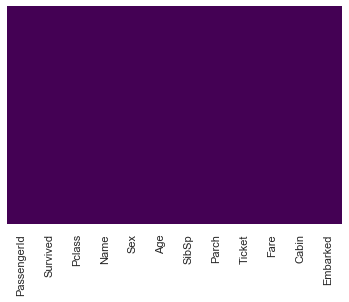

In [83]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
# titanic.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,214
2,184,184,184,184,184,184,184,184,184,16,184
3,491,491,491,491,491,491,491,491,491,12,491


In [29]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
df = titanic.groupby('Pclass') \
       .agg({'Age':'mean'}) \
       .rename(columns={'Age':'mean_age'}) \
       .reset_index()
df

,Pclass,mean_age
0,1,37.048118
1,2,29.866958
2,3,26.403259


In [41]:
#Age is a column name for our train data
mean_value=titanic['Age'].mean()
titanic['Age']=titanic['Age'].fillna(mean_value)
#this will replace all NaN values with the mean of the non null values
#For Median 
# meadian_value=train['Age'].median()
# train['Age']=train['Age'].fillna(median_value)

In [28]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = titanic[titanic.columns[titanic.isnull().mean() < threshold]]

# #Dropping rows with missing value rate higher than threshold
# data = data.loc[data.isnull().mean(axis=1) < threshold]

In [29]:
titanic.isnull().mean() ## near1 mean too many null should drop it

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
#Filling all missing values with 0
data = data.fillna(0)
#Filling missing values with medians of the columns
data = data.fillna(data.median())

In [37]:
#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts().idxmax(), inplace=True)

###  One-Hot encoding all

In [160]:
data=pd.read_csv('for_test.csv')

In [159]:
data_dummy = data
def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df
columns_to_dummify = data.select_dtypes(['object']).columns.tolist()
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
data_dummy.head(10)

,cat1_b,cat1_c,cat2_cat,cat2_dog,cat3_meaw,cat3_moy,cat3_sai
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,1,0,1,1,0,0


In [167]:
data_dummy=data
columns_to_dummify = data.select_dtypes(['object']).columns.tolist()
for i in columns_to_dummify:
    j = data_dummy.columns.get_loc(i)

    left = data_dummy.iloc[:, :j]
    dumb = pd.get_dummies(data_dummy[i])
    rite = data_dummy.iloc[:, j+1:]

    aa=pd.concat([left, dumb, rite], axis=1)

In [168]:
aa

,cat1,cat2,aung,meaw,moy,sai
0,a,dog,1,0,0,0
1,b,bird,0,0,0,1
2,a,cat,0,0,1,0
3,c,dog,0,1,0,0


### Rebalancing data

In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

In [ ]:
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

In [ ]:
label='columns'   ## Columns that contains multi-class unbalance variable

g = df.groupby(label, group_keys=False)
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

data = [
    ['a', 1, 2],
    ['b', 1, 1],
    ['b', 2, 2],
    [np.nan, np.nan, np.nan]
]

X = pd.DataFrame(data)
xt = DataFrameImputer().fit_transform(X)

## REF

In [2]:
# https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
# https://stackoverflow.com/questions/46967185/rearranging-columns-after-getting-dummies
# https://stackoverflow.com/questions/37532098/split-dataframe-into-two-on-the-basis-of-date
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
# https://stackoverflow.com/questions/50879915/how-to-split-data-using-time-based-in-test-and-train-respectively